# 逻辑回归
预测学生是否被大学录取，1为录取，0为不录取
根据两次测试的评分
二分类问题

In [2]:
import numpy as np#导入numpy库
import pandas as pd#导入pandas库
import matplotlib.pyplot as plt#导入绘图库

检查数据

In [4]:
path="data1.txt"#路径
data=pd.read_csv(path)#读取文件
print(data.head())#展示表格的头部

       Exam1      Exam2  Admitted
0  30.286711  43.894998         0
1  35.847409  72.902198         0
2  60.182599  86.308552         1
3  79.032736  75.344376         1
4  45.083277  56.316372         0


       Exam1      Exam2  Admitted
2  60.182599  86.308552         1
3  79.032736  75.344376         1
5  61.106665  96.511426         1
6  75.024746  46.554014         1
7  76.098787  87.420570         1


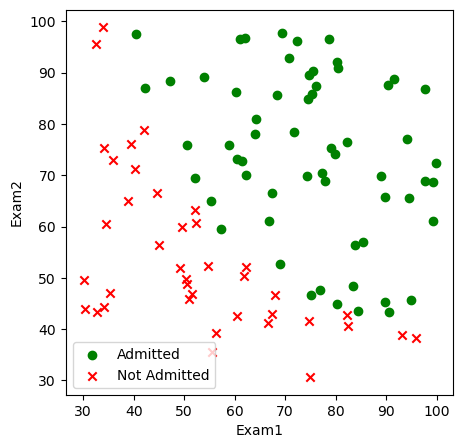

In [5]:
positive = data[data['Admitted'].isin([1])]#筛选Admitted中值为1的数据
negative = data[data['Admitted'].isin([0])]#筛选Admitted中值为0的数据
print(positive.head())#查看数据
fig=plt.figure(figsize=(5,5))#创建图像
plt.scatter(positive["Exam1"], positive["Exam2"],color='green',marker="o",label="Admitted")#绘制散点颜色绿色形状为圆圈
plt.scatter(negative["Exam1"],negative["Exam2"],color='red',marker="x",label="Not Admitted")#绘制散点图红色形状为x
plt.legend()#图例
plt.xlabel("Exam1")#x轴标签
plt.ylabel("Exam2")#y轴标签
plt.show()

如图所示，两个颜色的数据中间存在明显的决策边界


在逻辑回归中，我们所使用的是sigmoid函数
$$
g(z) = \frac{1}{1 + e^{-z}}
$$
因此，逻辑回归模型的函数就是
$$
h_{\theta}(x) = \frac{1}{1 + e^{-\theta^T x}}
$$

In [9]:
#现在，让我们来定义一下这个函数
def sigmoid(z):
    """
    sigmoid函数
    :param z:
    :return: sigmoid函数值
    """
    return 1/(1+np.exp(-z))

代价函数是
$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log(h_{\theta}(x^{(i)})) - (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)})) \right]$

In [11]:
def cost_function(x,y,theta):
    """
    定义代价函数
    :param x: 数据集
    :param y: 结果
    :param theta:模型参数
    :return:代价函数值
    """
    theta = np.matrix(theta)#转换为矩阵，方便后面进行运算
    x=np.matrix(x)
    y=np.matrix(y)
    m=np.multiply(-y,np.log(sigmoid(x*theta.T)))#数学公式
    n=np.multiply(1-y,np.log(1-sigmoid(x*theta.T)))
    return np.sum(m-n)/len(x)

此时，我们需要最小化代价函数
用梯度下降实现

$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

向量化：
$\frac{1}{m} X^T( Sigmoid(X\theta) - y )$

In [15]:
def gradient_descent(x,y,theta,alpha,num_iters):
    """
    梯度下降函数
    :param x:特征矩阵
    :param y:结果
    :param theta:参数向量
    :param alpha:学习率
    :param num_iters:迭代次数
    :return:
    """
    theta=np.matrix(theta)#转为矩阵，方便运算
    x=np.matrix(x)
    y=np.matrix(y)

    parameters = int(theta.ravel().shape[1])#获取参数数量
    m=len(y)#样本数量

    for i in range(num_iters):#开始迭代
        error=sigmoid(x*theta.T).ravel()-y#误差
        grad=np.zeros(parameters)#初始化梯度
        for j in range(parameters):#计算每个参数的梯度
            term=np.multiply(error,x[:,j])
            grad[j]=np.sum(term)/m
        theta-=alpha*grad#更新参数

    return theta

我们可以使用sigmoid函数对数据集x进行预测
我们可以假定当
${{h}_{\theta }}$大于等于0.5时，预测 y=1
当${{h}_{\theta }}$小于0.5时，预测 y=0 。

In [17]:
#处理数据
data.insert(0,'Ones',1)#往数据集前面插入一列值都为1的
cols=data.shape[1]#列数
x=data.iloc[:,0:cols-1]#除最后一列的所有列
y=data.iloc[:,cols-1:cols]#最后一列
x=np.array(x.values)
y=np.array(y.values)
theta=np.zeros(3)

我们先来看一下初始代价

In [19]:
initial_cost=cost_function(x,y,theta)
print(initial_cost)

0.6931471805599453


In [20]:
alpha=0.01
num_iters=1000

In [21]:
theta=gradient_descent(x, y, theta, alpha, num_iters)
print(f"训练后的参数: {theta}")

训练后的参数: [[ -75.0495424   306.69674142 -248.80943168]]


C:\Users\linyu\AppData\Local\Temp\ipykernel_26560\2406962462.py:8: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


In [22]:
def predict(x,theta):
    probabilities = sigmoid(np.dot(x, theta.T))
    # 根据概率值判断预测类别
    return [1 if prob >= 0.5 else 0 for prob in probabilities]

In [23]:
x_new=np.array([[1,68,69]])
predictions=predict(x_new,theta)
print(predictions)

[1]
